<a href="https://colab.research.google.com/github/omkarshitole18/AIML/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 27149428.19it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 788864.68it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 6718064.55it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3859507.45it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Batch 1, Loss: 28331.107421875
Epoch 1, Batch 101, Loss: -523.54296875
Epoch 1, Batch 201, Loss: -571.1298828125
Epoch 1, Batch 301, Loss: -1413.705078125
Epoch 1, Batch 401, Loss: -492.0166015625
Epoch 1, Batch 501, Loss: 229.728515625
Epoch 1, Batch 601, Loss: -844.525390625
Epoch 1, Batch 701, Loss: -743.5224609375
Epoch 1, Batch 801, Loss: -288.537109375
Epoch 1, Batch 901, Loss: -482.6015625
Epoch 2, Batch 1, Loss: -711.759765625
Epoch 2, Batch 101, Loss: -412.59765625
Epoch 2, Batch 201, Loss: -523.443359375
Epoch 2, Batch 301, Loss: -352.48046875
Epoch 2, Batch 401, Loss: -70.765625
Epoch 2, Batch 501, Loss: 246.708984375
Epoch 2, Batch 601, Loss: -259.705078125
Epoch 2, Batch 701, Loss: -127.78515625
Epoch 2, Batch 801, Loss: -350.763671875
Epoch 2, Batch 901, Loss: -252.33984375
Epoch 3, Batch 1, Loss: -265.333984375
Epoch 3, Batch 101, Loss: -241.580078125
Epoch 3, Batch 201, Loss: -266.431640

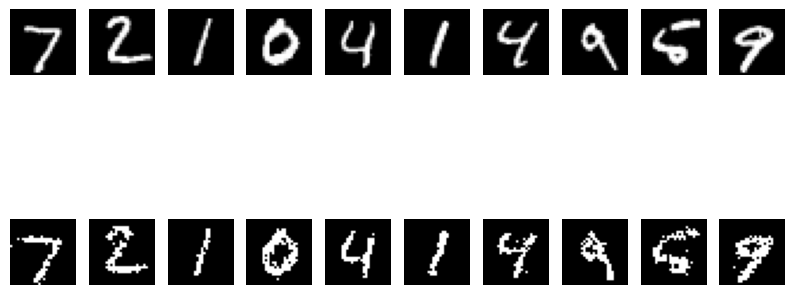

In [ ]:
#setA-Q1
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


batch_size = 64
num_epochs = 10
learning_rate = 0.001
num_visible = 784
num_hidden = 500


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define RBM model
class RBM(nn.Module):
    def __init__(self, num_visible, num_hidden):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(num_visible, num_hidden) * 0.1)
        self.v_bias = nn.Parameter(torch.zeros(num_visible))
        self.h_bias = nn.Parameter(torch.zeros(num_hidden))

    def sample_h(self, x):
        wx_b = torch.matmul(x, self.W) + self.h_bias
        p_h = torch.sigmoid(wx_b)
        return p_h, torch.bernoulli(p_h)

    def sample_v(self, h):
        wh_b = torch.matmul(h, self.W.t()) + self.v_bias
        p_v = torch.sigmoid(wh_b)
        return p_v, torch.bernoulli(p_v)

    def free_energy(self, x):
        wx_b = torch.matmul(x, self.W) + self.h_bias
        hidden_term = torch.sum(torch.log(1 + torch.exp(wx_b)))
        return -torch.sum(x * self.v_bias) - hidden_term


rbm = RBM(num_visible, num_hidden).to(device)
optimizer = optim.SGD(rbm.parameters(), lr=learning_rate)

# Training
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(train_loader):
        x = x.view(-1, num_visible).to(device)

        x_recon = x
        for _ in range(10):
            _, h_sample = rbm.sample_h(x_recon)
            _, x_recon = rbm.sample_v(h_sample)
        loss = rbm.free_energy(x) - rbm.free_energy(x_recon)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item()}')


with torch.no_grad():
    test_images = next(iter(test_loader))[0].view(-1, num_visible).to(device)
    _, generated_images = rbm.sample_v(torch.bernoulli(torch.sigmoid(torch.matmul(test_images, rbm.W) + rbm.h_bias)))


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i+11)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.3424 - val_loss: 0.1684
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1601 - val_loss: 0.1373
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.1343 - val_loss: 0.1243
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1239 - val_loss: 0.1167
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1164 - val_loss: 0.1112
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 89.79%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


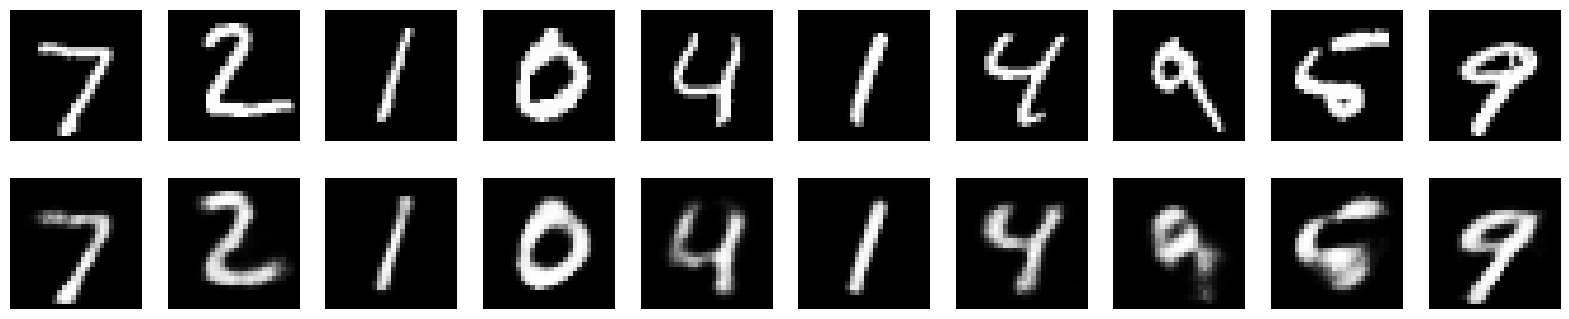

In [ ]:
#Set b-1
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255.0

# Step 2: Build the autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 32  # Dimension of the encoding

# Define the input layer
input_layer = Input(shape=(input_dim,))
# Encoder layers
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(input_layer, decoded)

# Define the encoder model
encoder = Model(input_layer, encoded)

# Step 3: Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Step 4: Use the encoder to transform the data
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# Step 5: Train a logistic regression model on the encoded data
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train_encoded, y_train)

# Step 6: Make predictions and evaluate the classifier
y_pred = classifier.predict(x_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optional: Visualize some reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


In [ ]:
#setA-3)
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RBM model
rbm = BernoulliRBM(n_components=256, learning_rate=0.01, n_iter=20, verbose=1)

# Initialize the logistic regression model
logistic = LogisticRegression(max_iter=1000)

# Create a pipeline with RBM and Logistic Regression
dbn_pipeline = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Fit the pipeline to the training data
dbn_pipeline.fit(X_train_scaled, y_train)

# Evaluate the pipeline on the test data
dbn_score = dbn_pipeline.score(X_test_scaled, y_test)
print(f'DB Classification score (dbn_score): {dbn_score:.4f}')


[BernoulliRBM] Iteration 1, pseudo-likelihood = -74312.21, time = 38.91s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -138408.25, time = 43.76s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -207402.31, time = 42.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -300430.17, time = 43.16s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -359466.12, time = 38.55s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -423318.00, time = 39.51s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -512547.26, time = 40.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -547798.17, time = 42.06s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -641053.52, time = 39.19s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -701119.89, time = 36.56s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -755755.40, time = 38.88s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -829864.30, time = 38.58s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -907704.20, time = 37.08s
[BernoulliRBM] Iteration 14, pseudo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DB Classification score (dbn_score): 0.2126


In [ ]:
#Set b-2)
import numpy as np
import random

class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3), dtype=int)
        self.current_player = 1  # Player 1 starts

    def reset(self):
        self.board.fill(0)
        self.current_player = 1
        return self.board.flatten()

    def step(self, action):
        row, col = divmod(action, 3)
        if self.board[row, col] == 0:  # Check if the cell is empty
            self.board[row, col] = self.current_player
            reward = self.check_winner()
            done = reward != 0 or np.all(self.board != 0)  # Check for win or draw
            self.current_player = 3 - self.current_player  # Switch players
            return self.board.flatten(), reward, done
        else:
            return self.board.flatten(), -10, False  # Invalid move

    def check_winner(self):
        for player in [1, 2]:
            if any(np.all(self.board[i, :] == player) for i in range(3)) or \
               any(np.all(self.board[:, i] == player) for i in range(3)) or \
               np.all(np.diag(self.board) == player) or \
               np.all(np.diag(np.fliplr(self.board)) == player):
                return player
        return 0  # No winner

    def available_actions(self):
        return np.where(self.board.flatten() == 0)[0]

class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1):
        self.q_table = {}  # State-action values
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_prob

    def get_state_key(self, state):
        return str(state)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(env.available_actions())
        state_key = self.get_state_key(state)
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(9)  # 3x3 grid
        return np.argmax(self.q_table[state_key]) if np.any(self.q_table[state_key]) else random.choice(env.available_actions())

    def update_q_table(self, state, action, reward, next_state):
        state_key = self.get_state_key(state)
        next_state_key = self.get_state_key(next_state)

        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(9)
        if next_state_key not in self.q_table:
            self.q_table[next_state_key] = np.zeros(9)

        best_next_action = np.argmax(self.q_table[next_state_key])
        td_target = reward + self.gamma * self.q_table[next_state_key][best_next_action]
        td_delta = td_target - self.q_table[state_key][action]
        self.q_table[state_key][action] += self.lr * td_delta

# Training the agent
def train_agent(episodes=10000):
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update_q_table(state, action, reward, next_state)
            state = next_state

# Testing the agent
def test_agent():
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        print("Action:", action, "State:\n", env.board)
        state = next_state
    print("Final board:\n", env.board)
    if reward == 1:
        print("Agent wins!")
    elif reward == -1:
        print("Opponent wins!")
    else:
        print("It's a draw!")

# Main program
if __name__ == "__main__":
    env = TicTacToe()
    agent = QLearningAgent()

    # Train the agent
    train_agent(episodes=5000)

    # Test the agent
    print("Testing agent:")
    test_agent()


Testing agent:
Action: 5 State:
 [[0 0 0]
 [0 0 1]
 [0 0 0]]
Action: 7 State:
 [[0 0 0]
 [0 0 1]
 [0 2 0]]
Action: 0 State:
 [[1 0 0]
 [0 0 1]
 [0 2 0]]
Action: 6 State:
 [[1 0 0]
 [0 0 1]
 [2 2 0]]
Action: 1 State:
 [[1 1 0]
 [0 0 1]
 [2 2 0]]
Action: 8 State:
 [[1 1 0]
 [0 0 1]
 [2 2 2]]
Final board:
 [[1 1 0]
 [0 0 1]
 [2 2 2]]
It's a draw!
